In [1]:
# Import necessary libraries

from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# Allow access to drive in colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
image_size = [256, 256]# Given image size

# Give dataset path
train_path = '/content/drive/MyDrive/Tomato/train'
val_path = '/content/drive/MyDrive/Tomato/val'

(-0.5, 255.5, 255.5, -0.5)

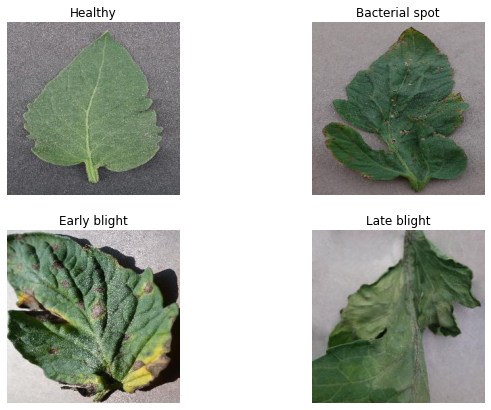

In [21]:
# Display random images from the train dataset for 4 classes

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(2,2,1)
plt.imshow(plt.imread('/content/drive/MyDrive/Tomato/train/Tomato___healthy/84cbb98b-5c2f-4367-8d78-52be491e66bd___GH_HL Leaf 336.JPG'))
plt.title('Healthy')
plt.axis('off')

fig.add_subplot(2, 2, 2)
plt.imshow(plt.imread('/content/drive/MyDrive/Tomato/train/Tomato___Bacterial_spot/33028adc-9dc2-4ac3-a7b9-7094200264f6___GCREC_Bact.Sp 3162.JPG'))
plt.title('Bacterial spot')
plt.axis('off')

fig.add_subplot(2, 2, 3)
plt.imshow(plt.imread('/content/drive/MyDrive/Tomato/train/Tomato___Early_blight/004cbe60-8ff9-4965-92df-e86694d5e9ba___RS_Erly.B 8253.JPG'))
plt.title('Early blight')
plt.axis('off')

fig.add_subplot(2, 2, 4)
plt.imshow(plt.imread('/content/drive/MyDrive/Tomato/train/Tomato___Late_blight/973b8b82-cccd-433c-a868-5dee559b2dce___GHLB Leaf 2.6 Day 12.JPG'))
plt.title('Late blight')
plt.axis('off')

In [4]:
# Transfer learning using InceptionV3

inception = InceptionV3(input_shape=image_size + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [5]:
# Do not train existing weights

for layer in inception.layers:
    layer.trainable = False

In [6]:
# Get the number of outputs classes of the dataset

folders = glob('/content/drive/MyDrive/Tomato/train/*')

In [7]:
# Add the top layer to work as per for our custom dataset

x = GlobalAveragePooling2D()(inception.output)
prediction = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs = inception.input, outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [8]:
# Compile the model

model.compile(
  loss = 'categorical_crossentropy',
  optimizer = 'sgd',
  metrics = ['accuracy']
)

In [22]:
# ImageDataGenerator on the train dataset to show variations during training 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# We will only rescale the validation set

val_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
# Load training dataset from the training directory

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [24]:
# Load validation dataset from the validation directory

val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical',shuffle=False)

Found 1000 images belonging to 10 classes.


In [25]:
# Model training

history = model.fit_generator(
  training_set,
  validation_data = val_set,
  epochs = 30, 
  verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
313/313 [==============================] - 2430s 8s/step - loss: 1.5077 - accuracy: 0.5262 - val_loss: 1.1614 - val_accuracy: 0.6530
Epoch 2/30
313/313 [==============================] - 190s 608ms/step - loss: 0.9936 - accuracy: 0.7052 - val_loss: 0.9756 - val_accuracy: 0.6880
Epoch 3/30
313/313 [==============================] - 186s 595ms/step - loss: 0.8373 - accuracy: 0.7488 - val_loss: 0.9018 - val_accuracy: 0.7020
Epoch 4/30
313/313 [==============================] - 187s 598ms/step - loss: 0.7608 - accuracy: 0.7692 - val_loss: 0.8265 - val_accuracy: 0.7180
Epoch 5/30
313/313 [==============================] - 187s 598ms/step - loss: 0.7100 - accuracy: 0.7893 - val_loss: 0.7839 - val_accuracy: 0.7350
Epoch 6/30
313/313 [==============================] - 187s 599ms/step - loss: 0.6649 - accuracy: 0.7939 - val_loss: 0.7449 - val_accuracy: 0.7590
Epoch 7/30
313/313 [==============================] - 187s 598ms/step - loss: 0.6379 - accuracy: 0.8048 - val_loss: 0.7379 - v

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


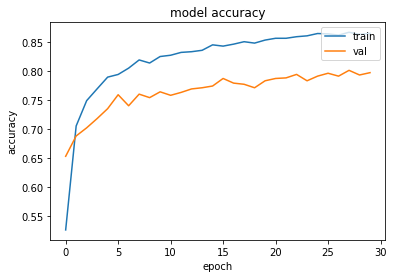

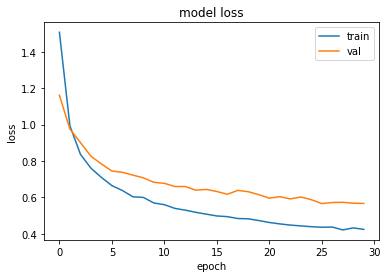

In [27]:
import matplotlib.pyplot as plt

print(history.history.keys())

# Training, validation accuracy and loss
plt.plot(inception_history.history['accuracy'])
plt.plot(inception_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

plt.plot(inception_history.history['loss'])
plt.plot(inception_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [49]:
# Predict using validation set as no testing set provided

import pandas as pd
val_set.reset()
y_pred = model.predict_generator(val_set)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [65]:
y_pred

array([[9.3556219e-01, 1.5319861e-02, 1.6584776e-03, ..., 1.8504531e-03,
        2.2600307e-05, 1.3739713e-05],
       [8.0558872e-01, 7.1731862e-03, 1.3393585e-03, ..., 1.6387299e-03,
        5.4499001e-04, 2.3820117e-02],
       [7.2254455e-01, 7.6795064e-02, 2.0814959e-02, ..., 1.7902628e-03,
        5.7801488e-04, 2.4979007e-03],
       ...,
       [2.4762294e-05, 3.2384142e-03, 5.1289026e-02, ..., 2.4494235e-05,
        8.2900590e-04, 9.3693316e-01],
       [1.2925942e-04, 1.5639706e-02, 1.2972179e-01, ..., 1.2313936e-02,
        2.0246021e-02, 7.0246047e-01],
       [3.9902851e-03, 8.9018524e-04, 6.4471461e-02, ..., 1.2247673e-03,
        1.3525809e-02, 8.8051820e-01]], dtype=float32)

In [66]:
# Create a dataframe

df = pd.DataFrame({'filename':val_set.filenames,'y':val_set.classes,'y_pred':np.argmax(y_pred,axis=1)})

In [67]:
df

,filename,y,y_pred
0,Tomato___Bacterial_spot/01a3cf3f-94c1-44d5-897...,0,0
1,Tomato___Bacterial_spot/01a46cb5-d354-4f59-868...,0,0
2,Tomato___Bacterial_spot/01d7f4fe-793f-4a9b-bc8...,0,0
3,Tomato___Bacterial_spot/01d9fc8d-5083-468d-a58...,0,0
4,Tomato___Bacterial_spot/01e079ba-939a-4681-898...,0,0
...,...,...,...
995,Tomato___healthy/Tomato___healthy_original_1c0...,9,6
996,Tomato___healthy/Tomato___healthy_original_1cb...,9,9
997,Tomato___healthy/Tomato___healthy_original_1cb...,9,9
998,Tomato___healthy/Tomato___healthy_original_1dd...,9,9


In [69]:
# Total misclassified predictions

misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 1000 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 1000 Validation images : 203


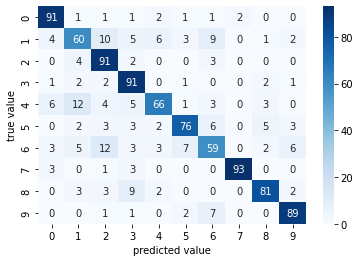

In [59]:
# Confusion matrix

from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap = "Blues",annot = True,fmt = 'g');
plt.xlabel('predicted value')
plt.ylabel('true value');

In [62]:
# Display Precision, Recall and Accuracy

print(classification_report(df.y, df.y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.843     0.910     0.875       100
           1      0.674     0.600     0.635       100
           2      0.711     0.910     0.798       100
           3      0.740     0.910     0.816       100
           4      0.815     0.660     0.729       100
           5      0.835     0.760     0.796       100
           6      0.670     0.590     0.628       100
           7      0.979     0.930     0.954       100
           8      0.862     0.810     0.835       100
           9      0.864     0.890     0.877       100

    accuracy                          0.797      1000
   macro avg      0.799     0.797     0.794      1000
weighted avg      0.799     0.797     0.794      1000



In [56]:
# Save the model for future predictions

model.save('/content/drive/MyDrive/project/saved_model/tomato_mclass_inception.h5')

In [63]:
# Loading the saved model for future predictions 

from tensorflow.keras.models import load_model
new_model=load_model('/content/drive/MyDrive/project/saved_model/tomato_mclass_inception.h5')